I decided to review article: Tong MJ, Blatt LM, Kao VW. Surveillance for hepatocellular carcinoma in patients with chronic viral hepatitis in the United States of America. J Gastroenterol Hepatol. 2001 May; 16(5):553-9. doi: 10.1046/j.1440-1746.2001.02470.x. PMID: 11350553. As described in the exercise I tried to focus on prevalence, specificity and sensitivity. In the study, researchers studied the ability of serum α-fetoprotein (AFP) measurements and abdominal ultrasound (US) examination to early detection of hepatocellular carcinoma (HCC). They measure ability of AFP and US to detect HCC over 7 years period in 602 patients with chronic viral hepatits. During the study, the prevalence of HCC detected with AFP and US was 5% (31 of 602 patients). Over 7 years, the researchers collect 2552 serum AFP – 4.2 tests per patient and 1388 US examinations – 2.3 per patient. In this study, researchers divided AFP measurements based on ng/ml concentration to 7 groups. 

In the study, researchers test predicting power of Abdominal ultrasound evaluations (US) (as one measurment) and the measurement of serum a- fetoprotein (AFP) levels. They test 7 AFP concetration (ng/mL) threshold:
1. AFP ≥ 8
2. AFP ≥ 11
3. AFP ≥ 13
4. AFP ≥ 16
5. AFP ≥ 19
6. AFP ≥ 21
7. AFP ≥ 24

AFP levels are normalized. Ratio of 1 = indicate normal levels. Values higher than 1 indicates AFP level higher than normal.

Workflow of my review can be summarized in following steps:
1. First, I generated a population of 602 people with a 5% disease prevalence
2. Secondly, I used code from jupyter to see all the common predicting statistics, [e.g. true positive (TP), false positive (FP), true negative (TN), false negative (FN) accuracy or positive predicting value  (PPV)] to get a general overview.
3. Next, I showed high FP hits and than focus on positive predicting value (PPV)
4. Then, I changed and tested the prevalence and population size during the test
5. Finally, I compared the relationship between sensitivity and specificity

Mostly, I focused on PPV values/ratio. As you will see further, the biggest problem of tests, are FP values. PPV is the probability that a specific event occurred when a test result is positive. Thats, why I think this is the most interesting statistics to evaluate for me. 

In [1]:
# import libraries 
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

import pandas as pd
import numpy as np
from scipy.stats import trapz
import random, uuid, math, json
import itertools
from itertools import product

generate population with defined prevalence (as True - disease or False - fit)

In [2]:
def pop_prev(population: int, prevalence: float):
    k = round((population / 100) * prevalence)
    j = population - k
    random_list = [False] * int(j) + [True] * int(k)
    random_list2 = np.array(random_list)
    
    return random_list2

In [3]:
# follow their population and prevalence
patient_population = 602
prevalence_percent = 5

In [4]:
pop_real = pop_prev(patient_population, prevalence_percent)
pop_real.sum()

30

As you can see, when I round off the 5% prevalence, the final number of positive hits is 30, not 31. In my opinion, they should add some digits to the 5% - to make it more accurate. I think the standard might be 5.XX%

To get general overview, I used your jupyter code, where you can change the sensitivity and specificity.

In [5]:
def get_universal_test_results(sample, sensitivity, specificity):
    # https://numpy.org/doc/stable/reference/generated/numpy.where.html
    response = np.where(sample,
                        # If actually true, the probability that the test returns true
                        sample * (np.random.random_sample((len(sample), )) < sensitivity),
                        # If actually false, the probability that the test returns false
                        ~sample * (np.random.random_sample((len(sample), )) > specificity))
    s = len(sample) # sample size
    tr = len(response[response==True]) # true test response
    fr = s - tr # false test response
    ap = len(sample[sample==True]) # actual positive
    an = s - ap # actual negative
    tp = len(sample[(sample == response) & (sample == True)]) # true positive of response
    tn = len(sample[(sample == response) & (sample == False)]) # true negative of response
    fn = ap - tp # false negative of response
    fp = an - tn # false positive of response
    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Prevalence_Threshold
    if sensitivity + specificity == 1:
        prevalence_threshold = 0.5
    else:
        prevalence_threshold = ((math.sqrt(sensitivity*(-specificity + 1)) - 1 + specificity)/
                                (sensitivity + specificity - 1))
        print("Universal Test Results")
    print("----------------------")
    print(F"{tr:,} positive test results for sample (n = {s:,}), with {ap/s*100:.1f}% sample prevalence.")
    print("----------------------")
    # '\t' is the special 'tab' character
    print(F"Actual positive  = {ap:,}  \t|\t Actual negative  = {an:,}")
    print(F"True positive  = {tp:,}   \t|\t True negative  = {tn:,}")
    print(F"False positive = {fp:,}  \t|\t False negative = {fn:,}")
    print("----------------------")
    print(F"Positive predictive value (PPV) = {tp/(tp+fp)*100:.1f}%")
    print(F"Prevalence threshold = {prevalence_threshold*100:.1f}% \t|\t Actual prevalence = {ap/s*100:.1f}%")
    print(F"Accuracy = {(tp+tn)/s*100:.1f}%")
    
    return 

test US and seven AFP levels

In [6]:
# Ultrasound Surveillance - Tab. 4 in paper
sensitivity = 1
specificity = 0.98

In [7]:
US =  get_universal_test_results(pop_real, sensitivity, specificity)

Universal Test Results
----------------------
47 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual positive  = 30  	|	 Actual negative  = 572
True positive  = 30   	|	 True negative  = 555
False positive = 17  	|	 False negative = 0
----------------------
Positive predictive value (PPV) = 63.8%
Prevalence threshold = 12.4% 	|	 Actual prevalence = 5.0%
Accuracy = 97.2%


You can see 17/47 of positive results are FP. 

Let's test AFP levels based on concentration threshold. Sensitivity and specificity for corresponding AFP levels are ordered left to right. From AFP ≥ 8 (left tail) to AFP ≥ 24 (right tail) 

In [8]:
# AFP, diff threshold - Tab. 4 in paper
sensitivity = [0.86, 0.86, 0.59, 0.55, 0.45, 0.41, 0.41]
specificity = [0.85, 0.89, 0.91, 0.93, 0.94, 0.94, 0.95]

In [9]:
for f, b in zip(sensitivity, specificity):
    g = get_universal_test_results(pop_real, f, b)

Universal Test Results
----------------------
105 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual positive  = 30  	|	 Actual negative  = 572
True positive  = 25   	|	 True negative  = 492
False positive = 80  	|	 False negative = 5
----------------------
Positive predictive value (PPV) = 23.8%
Prevalence threshold = 29.5% 	|	 Actual prevalence = 5.0%
Accuracy = 85.9%
Universal Test Results
----------------------
93 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual positive  = 30  	|	 Actual negative  = 572
True positive  = 29   	|	 True negative  = 508
False positive = 64  	|	 False negative = 1
----------------------
Positive predictive value (PPV) = 31.2%
Prevalence threshold = 26.3% 	|	 Actual prevalence = 5.0%
Accuracy = 89.2%
Universal Test Results
----------------------
56 positive test results for sample (n = 602), with 5.0% sample prevalence.
----------------------
Actual

As in the US, the biggest problem is the FP values and in some results the low TP value. They are also some FN. I think it depends on the disease, threat, etc. to evaluate which is the bigger problem - FP or FN or sometimes low TP value, but for now I will focus on FP values because for all concentration thresholds there is more FP than TP.

let's little change outoput of function

In [10]:
def get_universal_test_results(sample, sensitivity, specificity):
    # https://numpy.org/doc/stable/reference/generated/numpy.where.html
    response = np.where(sample,
                        # If actually true, the probability that the test returns true
                        sample * (np.random.random_sample((len(sample), )) < sensitivity),
                        # If actually false, the probability that the test returns false
                        ~sample * (np.random.random_sample((len(sample), )) > specificity))
    s = len(sample) # sample size
    tr = len(response[response==True]) # true test response
    fr = s - tr # false test response
    ap = len(sample[sample==True]) # actual positive
    an = s - ap # actual negative
    tp = len(sample[(sample == response) & (sample == True)]) # true positive of response
    tn = len(sample[(sample == response) & (sample == False)]) # true negative of response
    fn = ap - tp # false negative of response
    fp = an - tn # false positive of response
    PPV = round(tp/(tp+fp)*100, 1)
    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Prevalence_Threshold
    if sensitivity + specificity == 1:
        prevalence_threshold = 0.5
    else:
        prevalence_threshold = ((math.sqrt(sensitivity*(-specificity + 1)) - 1 + specificity)/
                                (sensitivity + specificity - 1))
    return fn, fp, PPV

In [26]:
# lets see how FN, FP and PPV is changing with different AFP thresholds
fal_n = []
fal_p = []
PPV = []
for f, b in zip(sensitivity, specificity):
    fn, fp, ppv = get_universal_test_results(pop_real, f, b)
    fal_n.append(fn)
    fal_p.append(fp)
    PPV.append(ppv)

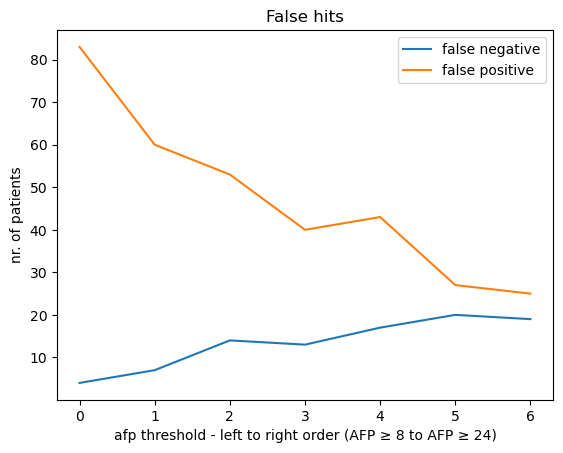

In [27]:
plt.plot(fal_n, label = "false negative")
plt.plot(fal_p, label = "false positive")
plt.title('False hits')
plt.xlabel('afp threshold - left to right order (AFP ≥ 8 to AFP ≥ 24)')
plt.ylabel('nr. of patients')
plt.legend()
plt.show()

With increasing concentration threshold FP is decreasing but FN increasing.

Now, let's see how PPV change with increasing AFP concentration threshold

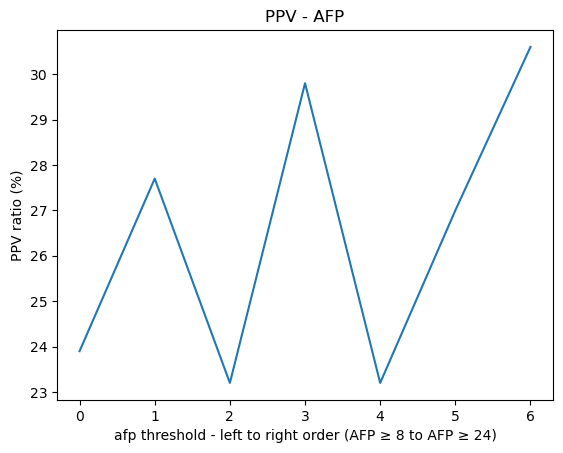

In [28]:
plt.plot(PPV)
plt.title('PPV - AFP')
plt.xlabel('afp threshold - left to right order (AFP ≥ 8 to AFP ≥ 24)')
plt.ylabel('PPV ratio (%)')
plt.show()

As you can see PPV for AFP is not monotonic function - there is no trend. I think, problem can be relatively small sample size. 

Now, I will test differnt population size (same prevalence, sensitivity and specificity as in paper).

In [29]:
# population of 100, 1000, 10000 and 100000 people and prevalnce of 5%
patient_popul = [100, 1000, 10000, 100000]

pop_list = []
for i in patient_popul:
    pop = pop_prev(i, prevalence_percent)
    pop_list.append(pop)

Ultrasound Surveillance

In [30]:
# Ultrasound Surveillance - Tab. 4 in paper
sensitivity = 1
specificity = 0.98

In [31]:
# test PPV for different sample size
US_pop_PPV = []
for i in pop_list:
        fn, fp, PPV = get_universal_test_results(i, sensitivity, specificity)
        US_pop_PPV.append(PPV)

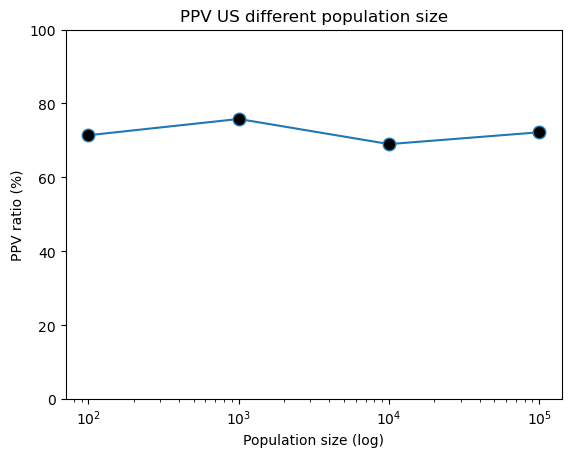

In [32]:
# plot PPV
plt.plot(patient_popul, US_pop_PPV,marker='o', markersize=9, markerfacecolor = 'black')
plt.title('PPV US different population size')
plt.xlabel('Population size (log)')
plt.ylabel('PPV ratio (%)')
plt.xscale('log')
plt.ylim([0, 100])
plt.show()

PPV for small sample size (100 people) is the highest. I think it happens becouse the population is small. With much higher sample size, the PPV slightly increasing with population size. I think we can say PPV for US with that sensitivity, specificity and disease prevalence is somewhere between 70-80 percent.

same analysis (different sample size) for AFP levels

In [33]:
# AFP, diff threshold - - Tab. 4 in paper
sensitivity = [0.86, 0.86, 0.59, 0.55, 0.45, 0.41, 0.41]
specificity = [0.85, 0.89, 0.91, 0.93, 0.94, 0.94, 0.95]

In [41]:
AFP_pop_PPV = []
for i in pop_list:
    for f, b in zip(sensitivity, specificity):
        fn, fp, PPV = get_universal_test_results(i, f, b)
        AFP_pop_PPV.append(PPV)

In [42]:
# split test to 4 (we test 4 population sizes)
split_set_pop = list()
set_size_pop = 4

for i in range(0, len(AFP_pop_PPV), set_size_pop):
    split_set_pop.append(AFP_pop_PPV[i:i+set_size_pop])

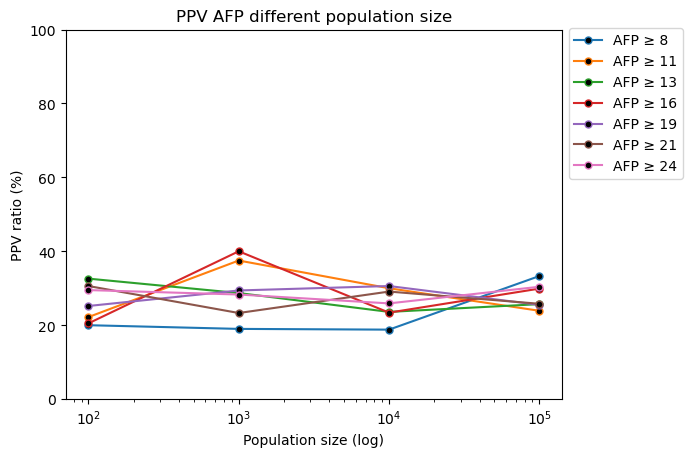

In [43]:
# plot PPV for AFP
for i in split_set_pop:
    plt.plot(patient_popul, i,marker='o', markersize=5, markerfacecolor = 'black')
    plt.title('PPV AFP different population size')
    plt.xlabel('Population size (log)')
    plt.ylabel('PPV ratio (%)')
    plt.xscale('log')
    plt.ylim([0, 100])
    plt.legend(['AFP ≥ 8', 'AFP ≥ 11', 'AFP ≥ 13','AFP ≥ 16','AFP ≥ 19', 'AFP ≥ 21','AFP ≥ 24'], loc='center left', bbox_to_anchor=(1, 0.8))

PPVs for all AFP levels are somewhere between 20 and 40 percent. 

Now I will test effect of different prevalence with sample size of 602 people

In [44]:
# I analyzed prevalence of 0.1, 1, 5, 10, 25 and 50 %
prevalence = [0.1, 1, 5, 10, 25, 50]

In [45]:
popul = []
for i in prevalence:
        ss = pop_prev(patient_population, i)
        popul.append(ss)

As befor, US first

In [46]:
# Ultrasound Surveillance - Tab. 4 in paper
sensitivity = 1
specificity = 0.98

In [47]:
PPV_US = []
for i in popul:
    fn, fp, PPV =  get_universal_test_results(i, sensitivity, specificity)
    PPV_US.append(PPV)

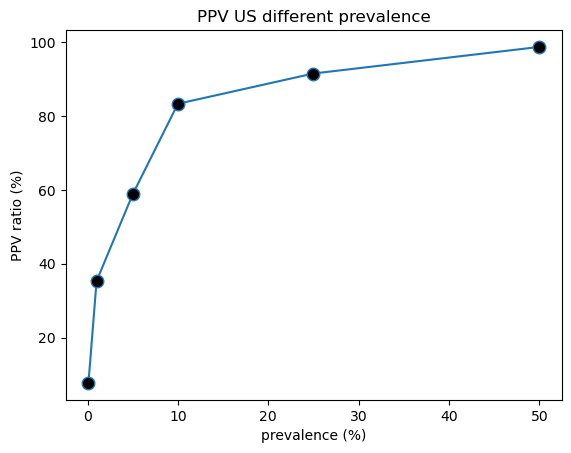

In [48]:
# plot PPV for different prevalence
plt.plot(prevalence, PPV_US, marker='o', markersize=9, markerfacecolor = 'black')
plt.title('PPV US different prevalence')
plt.xlabel('prevalence (%)')
plt.ylabel('PPV ratio (%)')
plt.show()

We can say with increasing prevalence the PPV ration increase

Let's analyze AFP levels

In [49]:
# AFP, diff threshold  - Tab. 4 in paper
sensitivity = [0.86, 0.86, 0.59, 0.55, 0.45, 0.41, 0.41]
specificity = [0.85, 0.89, 0.91, 0.93, 0.94, 0.94, 0.95]

In [50]:
PPV_AFP = []
for i in popul:
    for f, b in zip(sensitivity, specificity):
        fn, fp, PPV = get_universal_test_results(i, f, b)
        PPV_AFP.append(PPV)

In [51]:
# I analyze 6 different prevalence so split set according to this
split_set_pop2 = list()
set_size_pop2 = 6

for i in range(0, len(PPV_AFP), set_size_pop2):
    split_set_pop2.append(PPV_AFP[i:i+set_size_pop2])

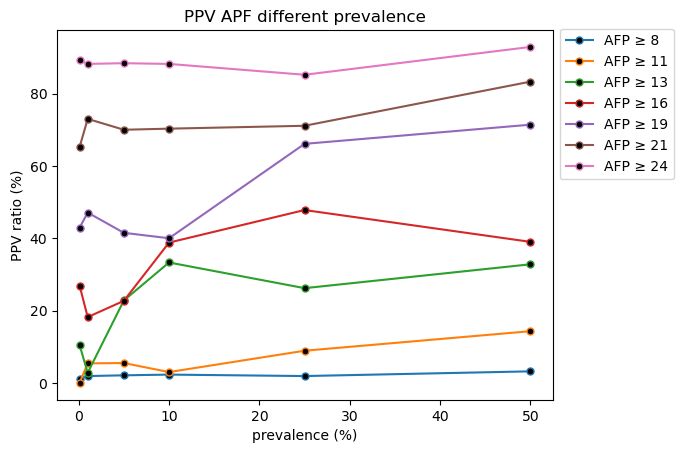

In [52]:
for x in split_set_pop2:
    plt.plot(prevalence, x, marker='o', markersize=5, markerfacecolor = 'black')
    plt.title('PPV APF different prevalence')
    plt.xlabel('prevalence (%)')
    plt.ylabel('PPV ratio (%)')
    plt.legend(['AFP ≥ 8', 'AFP ≥ 11', 'AFP ≥ 13','AFP ≥ 16','AFP ≥ 19', 'AFP ≥ 21','AFP ≥ 24'], loc='center left', bbox_to_anchor=(1, 0.8))

So, you can see how are AFP levels ordered from the lowest concetration threshold to the highest concetration threshold. You can see how, for population size of 602 people, PPV value for AFP ≥ 8 will be never higher than others etc. For threshold AFP ≥ 13 and higher there is increasing trend in PPV ration with increasing prevalence. To be honest, I am little bit wonder why there are so high values of PPV ratio in general.

In my last analysis I just wanted to see how PPV will chance when we change the sensitivity and specificity.

In [59]:
# both, sensitivity and specificity have values of 0.1, 0.3, 0.5, 0.7, 0.9
sens = np.arange(0.1,1,0.2) 
spec = np.arange(0.1,1,0.2)

# I wanted to see what will happens with PPV when i use sensitivity of 0.1 with specificity of 0.9, than 0.3 with 0.7 etc... and in opposit way
sens_order = -np.sort(-sens) # opposit order (0.9 to 0.1)
spec_order = -np.sort(-spec)

sens_lst = sens.tolist()
spec_lst = spec.tolist()
sens_lst_order = sens_order.tolist()
spec_lst_order = spec_order.tolist()

In [60]:
# sensitivity order from 0.1 to 0.9 and specificity from 0.9 to 0.1
PPV_artif_1 = []
for f, b in zip(sens_lst, spec_lst_order):
    fp,fn,PPV = get_universal_test_results(pop_real, f, b)
    PPV_artif_1.append(PPV)
PPV_artif_1

[4.8, 3.3, 6.0, 5.2, 5.1]

In [61]:
# opposit way: sensitivity order from 0.9 to 0.1 and specificity from 0.1 to 0.9
PPV_artif_2 = []
for f, b in zip(sens_lst_order, spec_lst):
    fp,fn,PPV = get_universal_test_results(pop_real, f, b)
    PPV_artif_2.append(PPV)
PPV_artif_2

[4.6, 4.8, 6.4, 5.9, 5.1]

In [62]:
# mean function
def Average(lst):
    return sum(lst) / len(lst)

In [63]:
average1 = Average(PPV_artif_1)
average1

4.88

In [64]:
average2 = Average(PPV_artif_2)
average2

5.359999999999999

I think, the relationship between sensitivity and specificity in context of PPV is clear. For both of them is mean of PPV ration around 5%.  

To sum up, the biggest problem for both tests are FP hits. To measure how this FP rate change in different conditions I use PPV metric. US shows consitently better PPV ration than AFP for different sample size and prevalence of 5%.
With increasing prevalence level there is also increasing of PPV. Different AFP threshold concetration shows different ability of increasing of PPV ratio. Higher threshold - higher PPV max.
At the end, maybe some bottleneck befor these test, which increase the prevalence should solve the problem with FP hits and make these tests more usefull.  